In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hoops = pd.read_csv('game_logs2019-2020.csv')

In [3]:
hoops.head()

,Player,Team,Match-up,Date,W/L,Min,Pts,FGM,FGA,FG%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,Mike Scott,PHI,@HOU,08/14/2020,W,20,10,3,4,75.0,...,75.0,1,6,7,3,0,0,0,0,37
1,Chris Clemons,HOU,vs.PHI,08/14/2020,L,17,4,2,7,28.6,...,-,0,1,1,4,1,1,1,4,-23
2,Joel Embiid,PHI,@HOU,08/14/2020,W,23,14,6,12,50.0,...,66.7,2,4,6,1,1,1,5,5,9
3,P.J. Tucker,HOU,vs.PHI,08/14/2020,L,29,7,3,6,50.0,...,-,0,1,1,2,0,1,0,2,-12
4,Jeff Green,HOU,vs.PHI,08/14/2020,L,25,17,8,10,80.0,...,100,0,0,0,4,1,1,0,4,-7


In [88]:
# Function if player has a double double 
def double_double(row):
    val = 0
    if (row['Pts'] >= 10) & (row['AST'] >= 10) | \
    (row['Pts'] >=10) & (row['REB'] >= 10) | (row['AST'] >=10) & (row['REB'] >= 10):
        val += 1
    return val

# Function if player has a triple double 
def triple_double(row):
    val = 0
    if (row['Pts'] >= 10) & (row['AST'] >= 10) & (row['REB'] >=10) | \
    (row['Pts'] >=10) & (row['AST'] >= 10) & (row['STL'] >= 10) | \
    (row['Pts'] >=10) & (row['REB'] >= 10) & (row['BLK'] >= 10) | \
    (row['Pts'] >=10) & (row['AST'] >= 10) & (row['BLK'] >= 10):
        val += 1
    return val

In [89]:
# Change date to date/time series
hoops['Date'] = pd.to_datetime(hoops['Date'])

# Double double column
hoops['D/D'] = hoops.apply(double_double, axis=1)

# Triple double column
hoops['T/D'] = hoops.apply(triple_double, axis=1)

# Draft kings score column 
hoops['DraftKings'] = hoops['Pts'] + .5*hoops['3PM'] + 1.25*hoops['REB'] + 1.5*hoops['AST'] \
+ 2*hoops['STL'] + 2*hoops['BLK'] -.5*hoops['TOV'] + 1.5*hoops['D/D'] + 3*hoops['T/D']

In [90]:
hoops.head()

,Player,Team,Match-up,Date,W/L,Min,Pts,FGM,FGA,FG%,...,REB,AST,STL,BLK,TOV,PF,+/-,D/D,T/D,DraftKings
0,Mike Scott,PHI,@HOU,2020-08-14,W,20,10,3,4,75.0,...,7,3,0,0,0,0,37,0,0,23.75
1,Chris Clemons,HOU,vs.PHI,2020-08-14,L,17,4,2,7,28.6,...,1,4,1,1,1,4,-23,0,0,14.75
2,Joel Embiid,PHI,@HOU,2020-08-14,W,23,14,6,12,50.0,...,6,1,1,1,5,5,9,0,0,24.50
3,P.J. Tucker,HOU,vs.PHI,2020-08-14,L,29,7,3,6,50.0,...,1,2,0,1,0,2,-12,0,0,13.75
4,Jeff Green,HOU,vs.PHI,2020-08-14,L,25,17,8,10,80.0,...,0,4,1,1,0,4,-7,0,0,27.00


In [91]:
hoops.to_csv('draftkings18-19.csv', index=False)

In [93]:
hoops.sort_values(by='DraftKings', ascending=False)[0:5]

,Player,Team,Match-up,Date,W/L,Min,Pts,FGM,FGA,FG%,...,REB,AST,STL,BLK,TOV,PF,+/-,D/D,T/D,DraftKings
20788,LeBron James,LAL,@DAL,2019-11-01,W,43,39,13,23,56.5,...,12,16,4,1,4,5,15,1,1,92.50
8687,Damian Lillard,POR,vs.GSW,2020-01-20,W,45,61,17,37,45.9,...,10,7,1,0,2,1,13,1,0,92.00
757,Luka Doncic,DAL,vs.MIL,2020-08-08,W,42,36,12,24,50.0,...,14,19,1,0,2,1,12,1,1,89.00
318,James Harden,HOU,vs.IND,2020-08-12,L,35,45,13,21,61.9,...,17,9,3,0,6,2,11,1,0,87.75
16431,James Harden,HOU,vs.ATL,2019-11-30,W,31,60,16,24,66.7,...,3,8,3,1,5,3,50,0,0,85.25


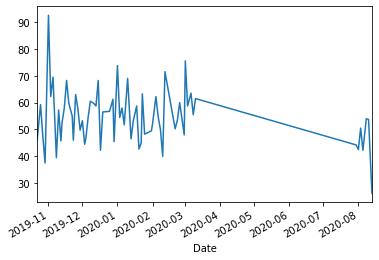

In [107]:
lebron = hoops[hoops['Player'] == 'LeBron James']
lebron.head()
lebron.index = lebron['Date']
lebron['DraftKings'].astype(float).plot();

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [176]:
X = hoops[['Pts', 'DraftKings']]
ss = StandardScaler()
X_sc = ss.fit_transform(X)
km = KMeans(n_clusters=10, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=10, random_state=42)

In [177]:
hoops['cluster'] = km.labels_

In [178]:
centroids = pd.DataFrame(ss.inverse_transform(km.cluster_centers_),
                        columns=['Pts','DraftKings'])

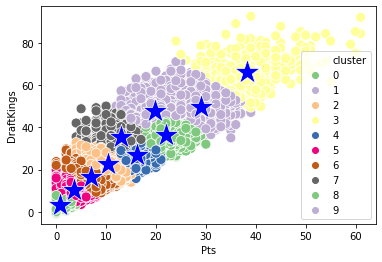

In [179]:
sns.scatterplot(data=hoops, x="Pts", y="DraftKings", s=100, hue='cluster',palette='Accent')

sns.scatterplot(data=centroids, x="Pts", y="DraftKings",s= 700,color='Blue',marker="*")


In [180]:
print(f'The silhouette score is: {round(silhouette_score(X_sc, km.labels_),2)}')

The silhouette score is: 0.36


In [7]:
lebron = hoops[hoops['Player'] == 'LeBron James']

In [8]:
lebron.head()

,Player,Team,Match-up,Date,W/L,Min,Pts,FGM,FGA,FG%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
197,LeBron James,LAL,vs.SAC,08/13/2020,L,15,17,6,13,46.2,...,100,1,2,3,4,0,0,3,0,-13
572,LeBron James,LAL,vs.DEN,08/10/2020,W,38,29,9,21,42.9,...,60.0,0,1,1,12,0,2,5,0,-10
791,LeBron James,LAL,@IND,08/08/2020,L,35,31,13,24,54.2,...,50.0,1,7,8,7,0,1,1,4,14
1168,LeBron James,LAL,vs.OKC,08/05/2020,L,30,19,7,19,36.8,...,62.5,1,10,11,4,1,0,0,1,-8
1366,LeBron James,LAL,@UTA,08/03/2020,W,35,22,9,16,56.3,...,100,1,7,8,9,2,1,4,3,0


In [9]:
lebronpd.to_datetime(lebron['Date'])

197     2020-08-13
572     2020-08-10
791     2020-08-08
1168    2020-08-05
1366    2020-08-03
           ...    
20788   2019-11-01
21277   2019-10-29
21612   2019-10-27
22039   2019-10-25
22391   2019-10-22
Name: Date, Length: 67, dtype: datetime64[ns]